In [1]:
#date, species, do I have a compiled version of the creatures?

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dateutil

In [32]:
df_non_combine = pd.read_csv('Created CSVs/Non_Combined_Name_Corrected_All_Seins.csv')

In [33]:
df_combine  = pd.read_csv('Created CSVs/Combined_Name_Corrected_All_Seins.csv')

In [34]:
df_non_combine['Date'] =  [dateutil.parser.parse(date) for date in list(df['Date'])]

In [35]:
df_non_combine['Number Caught'] = df_combine['Number Caught'].fillna(1)

In [36]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [37]:
def fix_quantity(quant_list):
    num_caught_list = []
    for num in list(quant_list):
        if type(num) ==  int:
            num_caught_list.append(num)
        elif is_number(num):
            num_caught_list.append(int(float(num)))
        else:
            number = ''
            started = False
            for char in num:
                if char.isdigit():
                    number += char
                    started = True
                else:
                    if char == '~':
                        print started
                    if started:
                        break
            if len(number):
                num_caught_list.append(int(number))
            else:
                if num in ['Numerous', 'TMTC', 'Too Many To Count']:
                    num_caught_list.append(30)
                else:
                    num_caught_list.append(1)
    return [int(x) for x in num_caught_list]

In [38]:
df_non_combine['Number Caught'] = fix_quantity(df_non_combine['Number Caught'])

False
False
False


In [40]:
df_non_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
Unnamed: 0       892 non-null int64
Date             892 non-null datetime64[ns]
Number Caught    892 non-null int64
Species          892 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 27.9+ KB


In [42]:
df_non_combine['year'] = [x.year for x in df_non_combine['Date']]

In [45]:
df_2017 = df_non_combine[df_non_combine['year'] == 2017]

In [47]:
df_2017.head()

,Unnamed: 0,Date,Number Caught,Species,year
750,756,2017-06-03,30,comb jelly,2017
751,757,2017-06-03,1,atlantic menhaden,2017
752,758,2017-06-03,14,blueback herring,2017
753,759,2017-06-03,1,american shad,2017
754,760,2017-06-03,1,striped bass,2017


In [48]:
spec_count =  pd.DataFrame({'Date':[], 'Species Count': []})

In [50]:
grouped_2017 =df_2017.groupby('Date')

In [55]:
dates = list(grouped_2017.groups)

In [67]:
grouped_2017.get_group(dates[2])['Species']

861                      tautog
862                striped bass
863           atlantic menhaden
864         atlantic silverside
865                silver perch
866             winter flounder
867        unidentified herring
868                 sand shrimp
869                 sand shrimp
870                    mud crab
871    unidentified hermit crab
872            asian shore crab
873                   blue crab
874                   mud snail
875          oyster drill snail
876                  comb jelly
877                  moon jelly
Name: Species, dtype: object

In [63]:
species_caught_list = []
for date in dates:
    species_caught = len(set(grouped_2017.get_group(date)['Species']))
    species_caught_list.append(species_caught)

In [64]:
spec_count['Date'] = dates
spec_count['Species Count'] = species_caught_list

In [79]:
spec_count = spec_count.set_index('Date')

In [87]:
spec_count = spec_count.sort_index()

In [88]:
spec_count.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2017-06-03 to 2017-10-07
Data columns (total 1 columns):
Species Count    14 non-null int64
dtypes: int64(1)
memory usage: 224.0 bytes


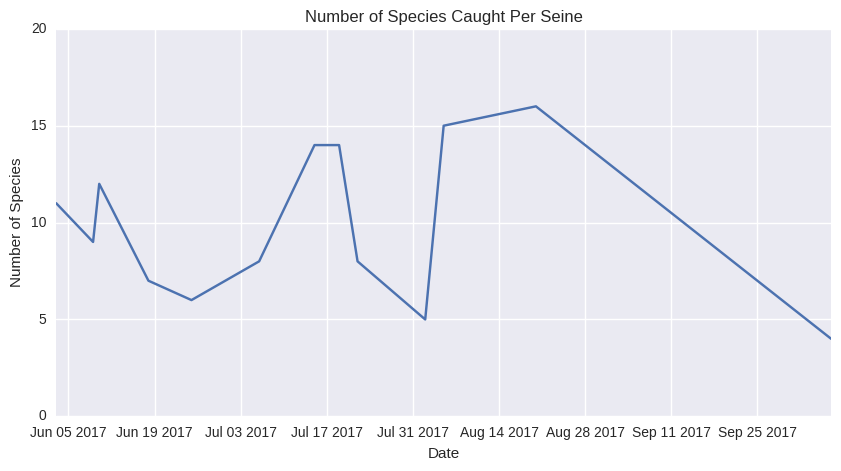

In [102]:
plt.figure(figsize=(10,5))
plt.title('Number of Species Caught Per Seine')
plt.xlabel('Date')
plt.ylabel('Number of Species')
plt.ylim(0,20)
ax = plt.plot(spec_count)

In [117]:
spec_count['Day of the Year'] =  [x.timetuple().tm_yday for x in spec_count.index]

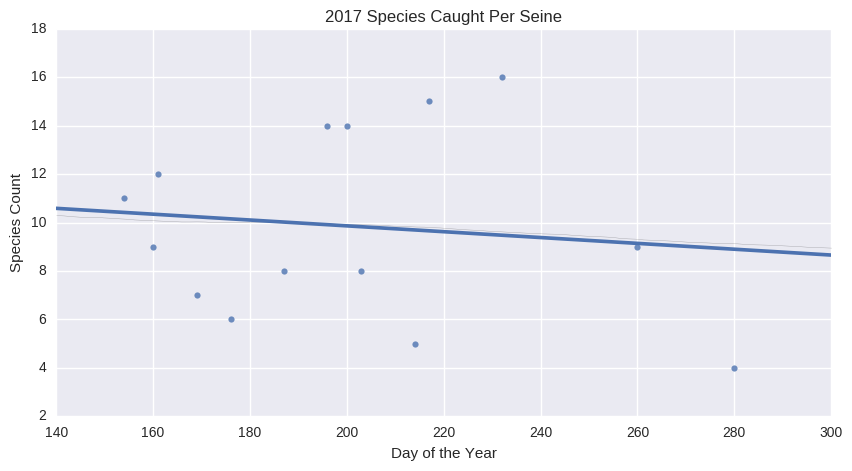

In [139]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(spec_count['Day of the Year'], spec_count['Species Count'],ci=False)
ax.set_title('2017 Species Caught Per Seine')


In [123]:
df_2017.columns

Index([u'Unnamed: 0', u'Date', u'Number Caught', u'Species', u'year'], dtype='object')

In [127]:
no_comb_df = df_2017[df_2017['Species'] != 'comb jelly']

In [132]:
plt_data = no_comb_df.groupby('Date').sum()['Number Caught']

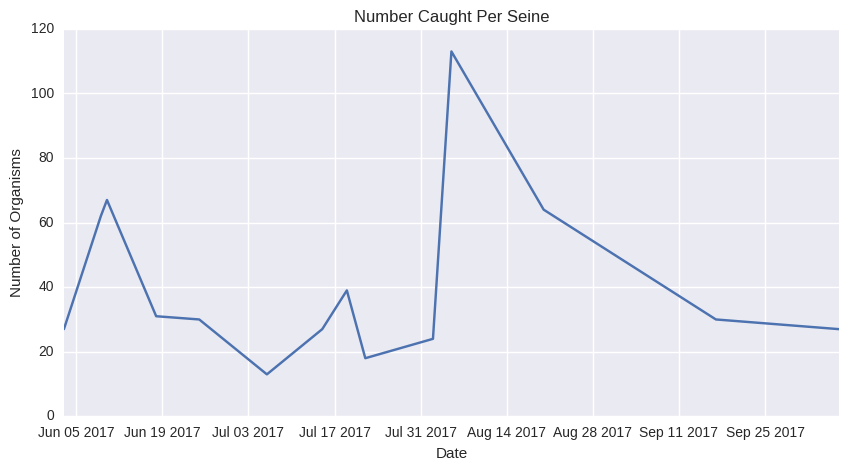

In [135]:
plt.figure(figsize=(10,5))
plt.title('Number Caught Per Seine')
plt.xlabel('Date')
plt.ylabel('Number of Organisms')
plt.plot(plt_data)

In [140]:
df_2017

,Unnamed: 0,Date,Number Caught,Species,year
750,756,2017-06-03,30,comb jelly,2017
751,757,2017-06-03,1,atlantic menhaden,2017
752,758,2017-06-03,14,blueback herring,2017
753,759,2017-06-03,1,american shad,2017
754,760,2017-06-03,1,striped bass,2017
755,761,2017-06-03,2,shore shrimp,2017
756,762,2017-06-03,3,mud snail,2017
757,763,2017-06-03,1,oyster drill snail,2017
758,764,2017-06-03,1,blue crab,2017
759,765,2017-06-03,2,asian shore crab,2017
